In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern


In [6]:
# Configuration
DATA_PATH = r"C:\Projects\Data_Science\QR_Code_Fraud_Detection"  # Raw string for Windows path
IMAGE_SIZE = (300, 300)  # Standardize image size
CLASSES = ['First_Print', 'Second_Print']

In [7]:
def feature_extractor(img):
    """Extract 6 important features with proper syntax"""
    img = cv2.resize(img, IMAGE_SIZE)
    
    return [
        np.mean(img),                        # Feature 1: Mean intensity
        np.std(img),                         # Feature 2: Contrast
        cv2.Laplacian(img, cv2.CV_64F).var(),# Feature 3: Sharpness
        np.median(img),                      # Feature 4: Median intensity
        cv2.Canny(img, 100, 200).mean(),     # Feature 5: Edge density
        local_binary_pattern(img, P=8, R=1, method='uniform').var()  # Feature 6: Texture variation
    ]

In [8]:
# Load and process images
features = []
labels = []

for class_idx, class_name in enumerate(CLASSES):
    class_path = os.path.join(DATA_PATH, class_name)
    print(f"Processing {class_name} images...")
    
    for img_name in os.listdir(class_path)[:100]:  # First 100 images per class
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is not None:
            features.append(feature_extractor(img))
            labels.append(class_idx)

Processing First_Print images...
Processing Second_Print images...


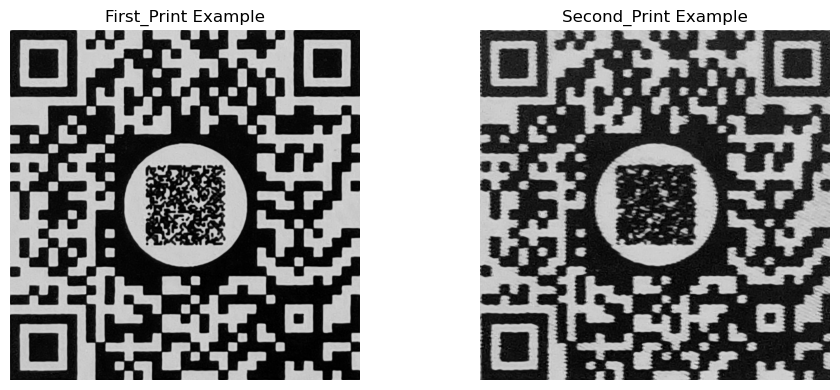

In [9]:
# Convert to numpy arrays
X = np.array(features)
y = np.array(labels)

# Visualization 1: Sample images
plt.figure(figsize=(10, 4))
for i in range(2):
    sample_img = cv2.imread(os.path.join(DATA_PATH, CLASSES[i], os.listdir(os.path.join(DATA_PATH, CLASSES[i]))[0]))
    plt.subplot(1, 2, i+1)
    plt.imshow(sample_img, cmap='gray')
    plt.title(f"{CLASSES[i]} Example")
    plt.axis('off')
plt.tight_layout()
plt.show()

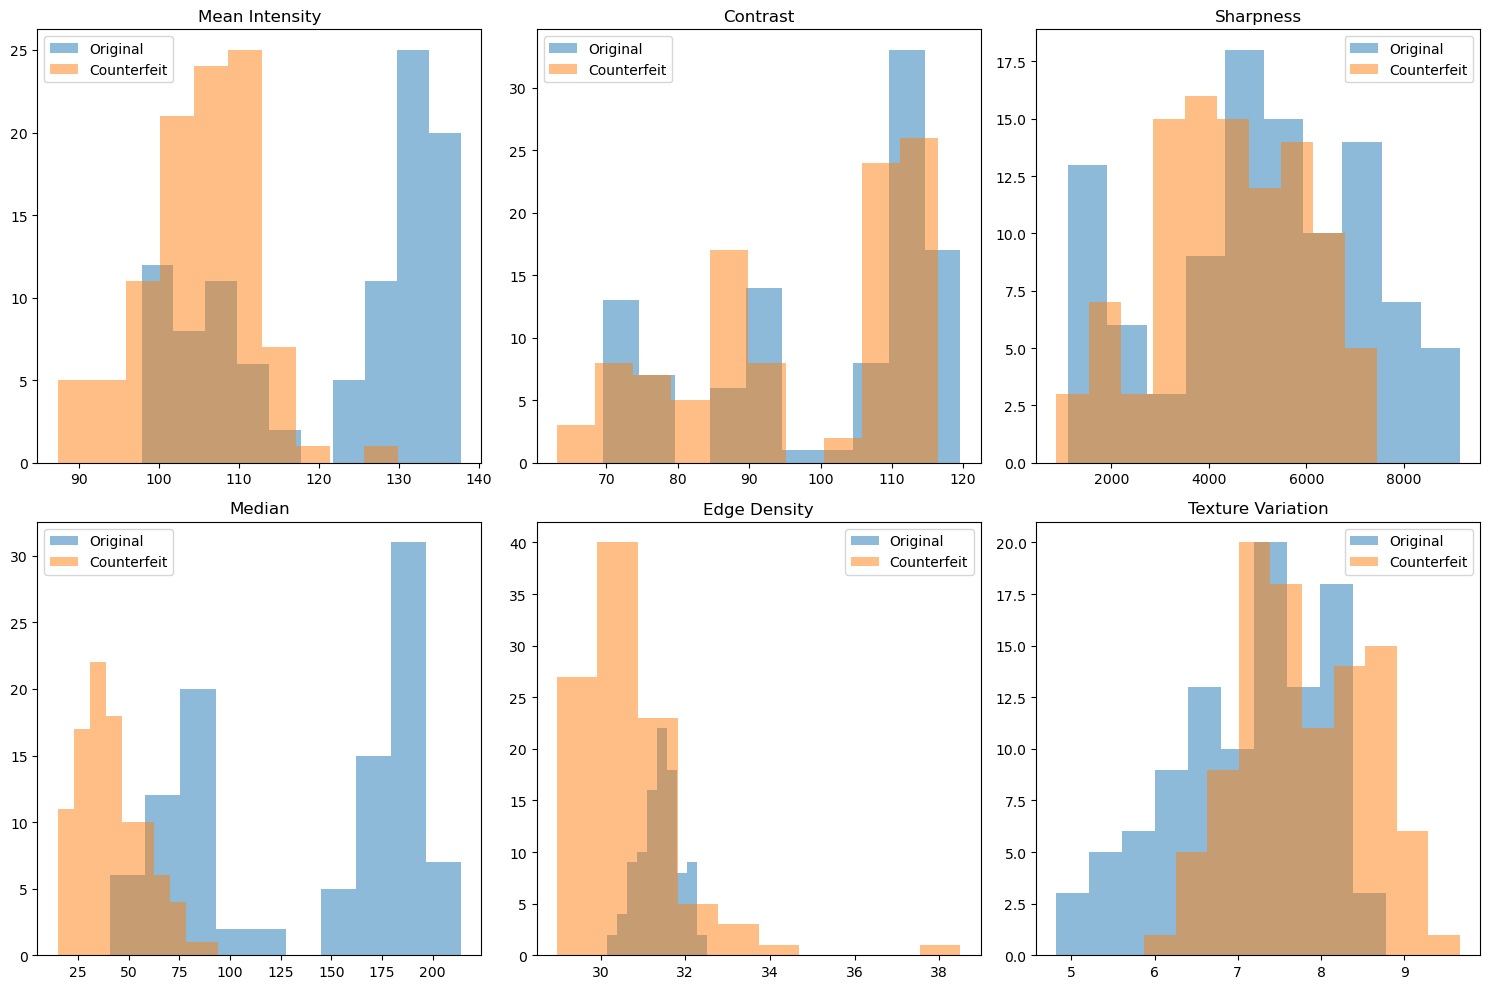

In [10]:
# Visualization 2: Feature distributions
feature_names = ['Mean Intensity', 'Contrast', 'Sharpness', 'Median', 'Edge Density', 'Texture Variation']
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist(X[y == 0, i], alpha=0.5, label='Original')
    plt.hist(X[y == 1, i], alpha=0.5, label='Counterfeit')
    plt.title(feature_names[i])
    plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nFeature Importance:")
for name, weight in zip(feature_names, model.coef_[0]):
    print(f"{name}: {weight:.4f}")



Model Accuracy: 0.90

Feature Importance:
Mean Intensity: 0.3164
Contrast: 0.0006
Sharpness: -0.0016
Median: -0.3149
Edge Density: 1.3020
Texture Variation: 0.6065


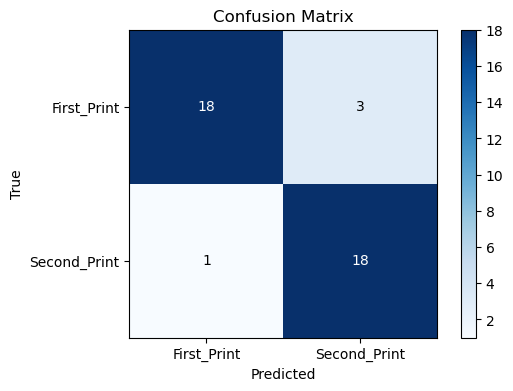

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(CLASSES))
plt.xticks(tick_marks, CLASSES)
plt.yticks(tick_marks, CLASSES)
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")
plt.show()